In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
path = '/content/drive/MyDrive/Final Project BBS/data/'
file_games = 'games_data_06122025.csv'
file_reviews = 'steam_reviews_sentiment_aspects.csv'
df_raw = pd.read_csv(f"{path}{file_games}", encoding="latin1")
df_sentiment = pd.read_csv(f"{path}{file_reviews}")

# Games Data Analysis

In [ ]:
df_raw.head()

,Name,Discount,Price,Rating,Release,Follows,Online,Peak,AppID
0,PAYDAY 2,NaN,9.99,0.8856,8/1/2013,8202925,26904,247709,218620
1,Counter-Strike 2,NaN,Free,0.8606,8/1/2012,4609179,1238339,1862531,730
2,PUBG: BATTLEGROUNDS,NaN,Free,0.5974,12/1/2017,3422238,306689,3257248,578080
3,Grand Theft Auto V Legacy,NaN,NaN,0.8698,4/1/2015,3415086,106188,364548,271590
4,Deep Rock Galactic,-0.7,8.99,0.9625,5/1/2020,2769765,9530,54160,548430


In [ ]:
df_raw.shape

(110, 9)

In [5]:
df = df_raw.copy()
df.columns = df.columns.str.strip()
df["Price"] = np.where(df["Price"] == "Free", 0, df["Price"])
df["Price"] = df["Price"].astype(float)
df["Release"] = pd.to_datetime(df["Release"])
df['release_year'] = df['Release'].dt.year

In [ ]:
# Null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          110 non-null    object        
 1   Discount      20 non-null     float64       
 2   Price         105 non-null    float64       
 3   Rating        110 non-null    float64       
 4   Release       110 non-null    datetime64[ns]
 5   Follows       110 non-null    int64         
 6   Online        110 non-null    int64         
 7   Peak          110 non-null    int64         
 8   AppID         110 non-null    int64         
 9   release_year  110 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(1)
memory usage: 8.3+ KB


In [ ]:
df.describe()

,Discount,Price,Rating,Release,Follows,Online,Peak,AppID,release_year
count,20.00000,105.000000,110.000000,110,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02,110.000000
mean,-0.69000,24.824952,0.860165,2018-03-24 21:09:49.090909184,8.438076e+05,4.423240e+04,2.900364e+05,6.378369e+05,2017.745455
min,-0.90000,0.000000,0.460000,2004-11-01 00:00:00,3.719130e+05,6.300000e+01,9.503000e+03,2.400000e+02,2004.000000
25%,-0.85000,8.990000,0.807975,2015-12-16 12:00:00,4.645005e+05,5.324500e+03,6.726000e+04,2.773850e+05,2015.250000
50%,-0.75000,19.990000,0.881950,2017-12-16 12:00:00,5.643740e+05,1.500750e+04,1.127100e+05,4.203350e+05,2017.500000
75%,-0.63750,39.990000,0.942825,2021-01-16 12:00:00,7.995420e+05,3.060375e+04,2.525990e+05,9.557900e+05,2020.750000
max,-0.25000,69.990000,0.976900,2025-09-01 00:00:00,8.202925e+06,1.238339e+06,3.257248e+06,3.419430e+06,2025.000000
std,0.20105,19.695663,0.103622,NaN,9.593952e+05,1.434996e+05,4.994432e+05,5.788091e+05,4.184805


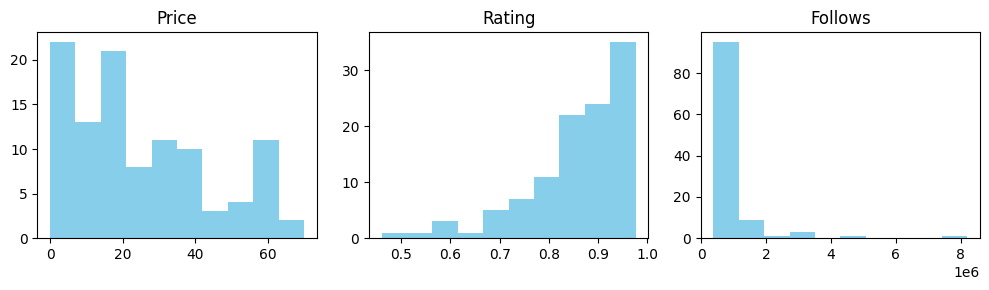

In [ ]:
# Histograms of price, rating and follows
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

columns = ["Price", "Rating", "Follows"]

for ax, col in zip(axes, columns):
    ax.hist(df[col], color="skyblue")
    ax.set_title(col)

plt.tight_layout()
plt.show()

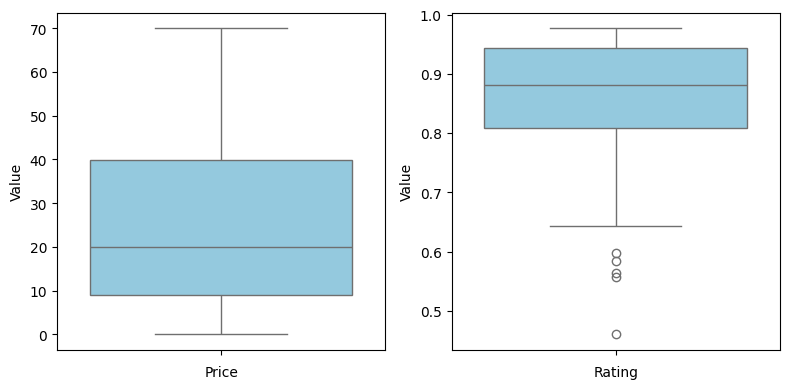

In [ ]:
# Box plots of price and rating
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(y=df['Price'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Value')

sns.boxplot(y=df['Rating'], ax=axes[1], color='skyblue')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

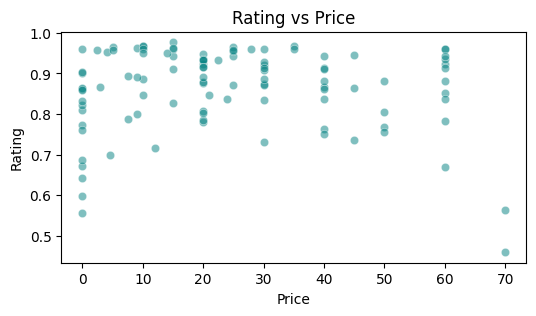

In [ ]:
# Scatter plot of Price vs. Rating
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Price',y='Rating',
                color='teal', alpha=0.5)
plt.title('Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show();

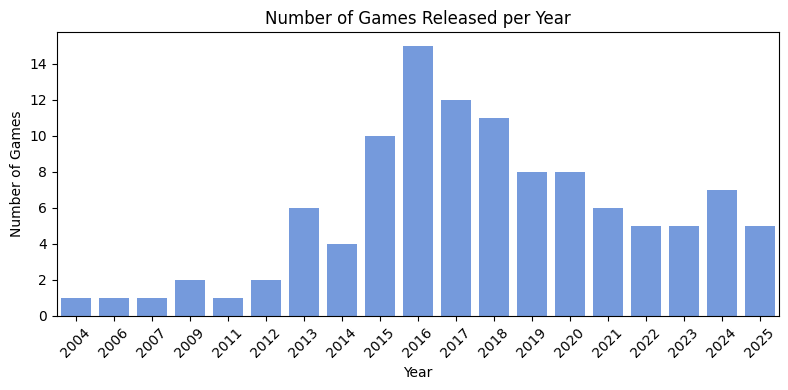

In [ ]:
# Number of games released per year
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='release_year', color='cornflowerblue')

plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Reviews data analysis

In [ ]:
df_sentiment.head()

,game,app_id,recommended,timestamp_created,author_playtime,date,clean_review,trunc_review,sentiment_label,confidence_score,...,story,gameplay,price,word_count,index,zs_graphics_score,zs_performance_score,zs_story_score,zs_gameplay_score,zs_price_score
0,PAYDAY 2,218620,True,1765018293,1394,2025-12-06 10:51:33,"I rodded bank,then i start game","i rodded bank, then i start game",1 star,0.248288,...,0,0,0,7,0,0.001864,0.789873,0.072499,0.996646,0.070791
1,PAYDAY 2,218620,False,1765005087,886,2025-12-06 07:11:27,Game is a steaming pile that doesn't even work...,game is a steaming pile that doesn't even work...,1 star,0.952912,...,0,0,0,69,1,0.238581,0.657618,0.359851,0.842916,0.241639
2,PAYDAY 2,218620,False,1764993460,13063,2025-12-06 03:57:40,clicked no because i was bored,clicked no because i was bored,1 star,0.601361,...,0,0,0,6,2,0.333301,0.008606,0.009890,0.042483,0.336748
3,PAYDAY 2,218620,True,1764991399,44,2025-12-06 03:23:19,better than PAYDAY 3,better than payday 3,5 stars,0.603237,...,0,0,0,4,3,0.000000,0.000000,0.000000,0.000000,0.000000
4,PAYDAY 2,218620,True,1764976971,9650,2025-12-05 23:22:51,"I highly recommend this game as it is great, c...","i highly recommend this game as it is great, c...",4 stars,0.480363,...,0,0,1,406,4,0.239323,0.991853,0.499380,0.963858,0.364050


In [ ]:
df_sentiment.shape

(9182, 25)

Text(0, 0.5, 'Reviews')

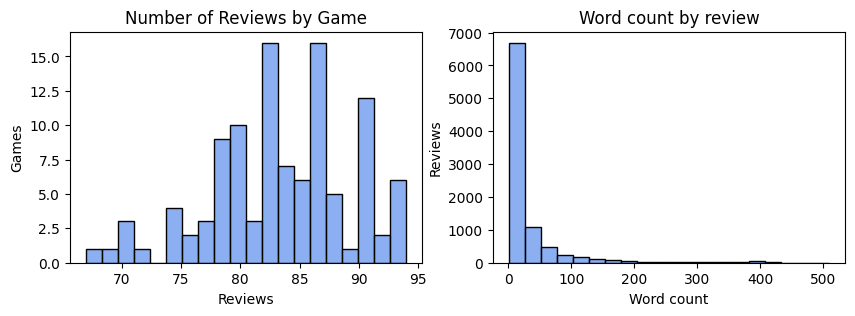

In [ ]:
review_count = df_sentiment.groupby('app_id').size().reset_index(name='review_count')
review_count = review_count[review_count["review_count"] <=100]

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data= review_count, x='review_count', bins=20, color='cornflowerblue', ax=axes[0])
axes[0].set_title('Number of Reviews by Game')
axes[0].set_xlabel('Reviews')
axes[0].set_ylabel('Games')

sns.histplot(data= df_sentiment, x='word_count', bins=20, color='cornflowerblue', ax=axes[1])
axes[1].set_title('Word count by review')
axes[1].set_xlabel('Word count')
axes[1].set_ylabel('Reviews')


In [ ]:
print(f"Average number of reviews by game: {review_count['review_count'].mean()}")
print(f"Average number of words by review: {df_sentiment['word_count'].mean()}")


Average number of reviews by game: 83.36111111111111
Average number of words by review: 32.04933565671967


In [ ]:
# Recommended distribution
df_sentiment.value_counts("recommended", normalize=True)

,proportion
recommended,
True,0.831736
False,0.168264


# Sentiment data analysis

In [ ]:
# Distribution of sentiment label
df_sentiment.value_counts("sentiment_label", normalize = True)

,proportion
sentiment_label,
5 stars,0.433239
4 stars,0.224352
1 star,0.179808
3 stars,0.102919
2 stars,0.059682


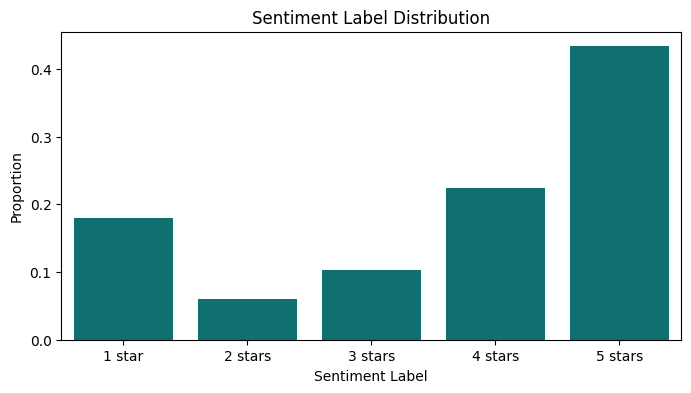

In [16]:
# Bar plot for sentiment labels
plt.figure(figsize=(8, 4))
sentiment_counts = df_sentiment['sentiment_label'].value_counts(normalize = True).reset_index()
sns.barplot(data=sentiment_counts, x='sentiment_label',y='proportion',
              order=sorted(set(df_sentiment["sentiment_label"])), color='teal')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.show()

In [ ]:
# Distribution of positive reviews
df_sentiment.value_counts("positive", normalize = True)

,proportion
positive,
1,0.657591
0,0.342409


Text(0, 0.5, 'Confidence Score')

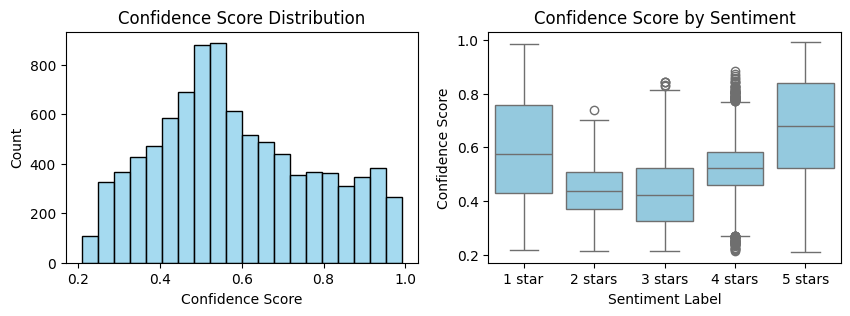

In [17]:
# Confidence score plots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data= df_sentiment, x='confidence_score', bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Confidence Score Distribution')
axes[0].set_xlabel('Confidence Score')
axes[0].set_ylabel('Count')

categories_order = sorted(df_sentiment['sentiment_label'].unique())

sns.boxplot(data=df_sentiment,  x='sentiment_label', y='confidence_score',
            color='skyblue', order=categories_order, ax=axes[1])
axes[1].set_title('Confidence Score by Sentiment')
axes[1].set_xlabel('Sentiment Label')
axes[1].set_ylabel('Confidence Score')


In [ ]:
df_sentiment.groupby("sentiment_label")["confidence_score"].mean()

,confidence_score
sentiment_label,
1 star,0.591876
2 stars,0.439215
3 stars,0.434823
4 stars,0.522270
5 stars,0.672326


In [ ]:
# Recommended vs sentiment proportions
df_sentiment.groupby("sentiment_label")["recommended"].mean()

,recommended
sentiment_label,
1 star,0.447002
2 stars,0.388686
3 stars,0.822222
4 stars,0.981553
5 stars,0.977124


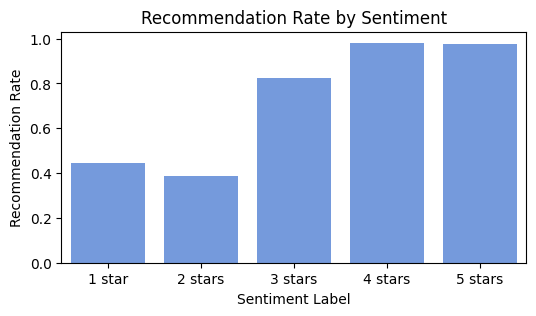

In [18]:
# Bar plot
plt.figure(figsize=(6, 3))
sns.barplot(data=df_sentiment, x='sentiment_label', y='recommended',
            color='cornflowerblue', order=categories_order, errorbar=None)
plt.title('Recommendation Rate by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Recommendation Rate')
plt.show()

## Sentiment by game

In [12]:
# Group data by game
sentiment_by_game = df_sentiment.groupby("app_id")[["positive","recommended"]].mean().reset_index()
sentiment_by_game = pd.merge(df[["AppID","Rating"]], sentiment_by_game, left_on="AppID", right_on = "app_id", how = "inner")

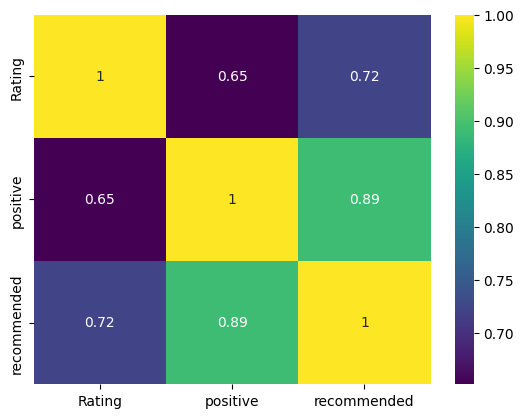

In [13]:
# Correlation matrix
corr_games = sentiment_by_game[["Rating","positive","recommended"]].corr()
sns.heatmap(corr_games, annot=True, cmap='viridis')
plt.show()

Text(0.5, 0, 'Rating')

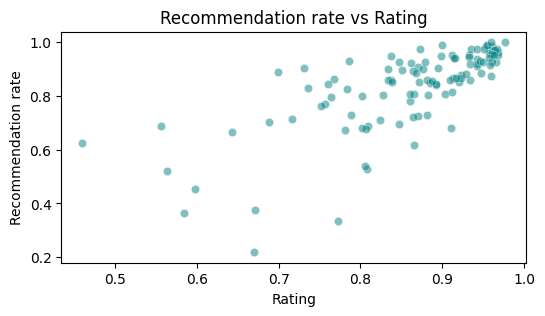

In [14]:
# Scatter plot of recommeded atio vs rating
plt.figure(figsize=(6, 3))

sns.scatterplot(data=sentiment_by_game, y='recommended',x='Rating',
                color='teal', alpha=0.5, legend = False)

plt.title('Recommendation rate vs Rating')
plt.ylabel('Recommendation rate')
plt.xlabel('Rating')


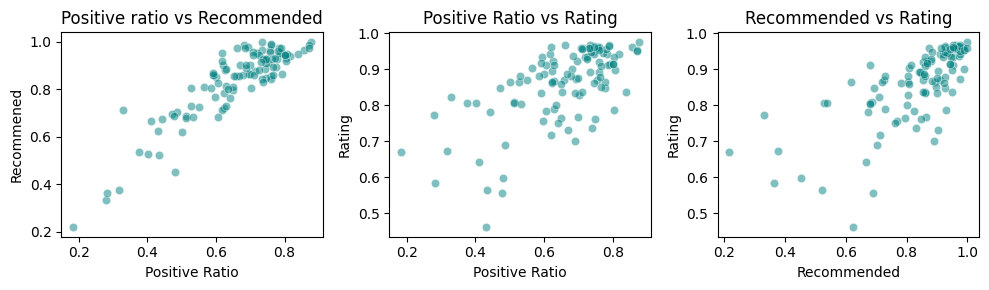

In [ ]:
# Scatter plots of recommeded and positive ratio vs rating
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

sns.scatterplot(data=sentiment_by_game, x='positive',y='recommended',
                color='teal', alpha=0.5, legend = False,ax=axes[0]
)
axes[0].set_title('Positive ratio vs Recommended')
axes[0].set_xlabel('Positive Ratio')
axes[0].set_ylabel('Recommened')

sns.scatterplot(data=sentiment_by_game, x='positive',y='Rating',
                color='teal', alpha=0.5, legend = False,ax=axes[1]
)
axes[1].set_title('Positive Ratio vs Rating')
axes[1].set_xlabel('Positive Ratio')
axes[1].set_ylabel('Rating')

sns.scatterplot(data=sentiment_by_game, x='recommended',y='Rating',
                color='teal', alpha=0.5, legend = False,ax=axes[2]
)
axes[2].set_title('Recommended vs Rating')
axes[2].set_xlabel('Recommended')
axes[2].set_ylabel('Rating')

plt.tight_layout()
plt.show()

## Aspects Analysis

In [6]:
df_sentiment[['graphics', 'performance', 'story', 'gameplay', 'price']].mean()
df_sentiment['matching'] = np.where(df_sentiment[['graphics', 'performance', 'story', 'gameplay', 'price']].sum(axis=1)>0,1,0)

In [ ]:
df_sentiment[['graphics', 'performance', 'story', 'gameplay', 'price','matching']].mean()

,0
graphics,0.044544
performance,0.032782
story,0.057939
gameplay,0.082771
price,0.046504
matching,0.181769


In [7]:
# Identify top aspect
cols_zs = ['zs_graphics_score','zs_performance_score',
           'zs_story_score','zs_gameplay_score','zs_price_score']

df_sentiment["top_aspect"] = (
    df_sentiment[cols_zs]
    .idxmax(axis=1)
    .str.replace("zs_", "")
    .str.replace("_score", "")
)
df_sentiment["top_aspect"] = df_sentiment["top_aspect"].str.capitalize()
df_sentiment["top_aspect"] = np.where(df_sentiment["word_count"]<5, None, df_sentiment["top_aspect"])


In [8]:
# Keep reviews with at least 5 words and group data by game
df_sentiment_5w = df_sentiment[df_sentiment["word_count"]>=5]

sentiment_by_game_5w = (df_sentiment_5w
                        .groupby("app_id")[
                            ["positive","recommended"] + cols_zs]
                        .mean()
                        .reset_index())

sentiment_by_game_5w = pd.merge(df[["AppID","Rating"]],
                                sentiment_by_game_5w,
                                left_on="AppID",
                                right_on = "app_id",
                                how = "inner")

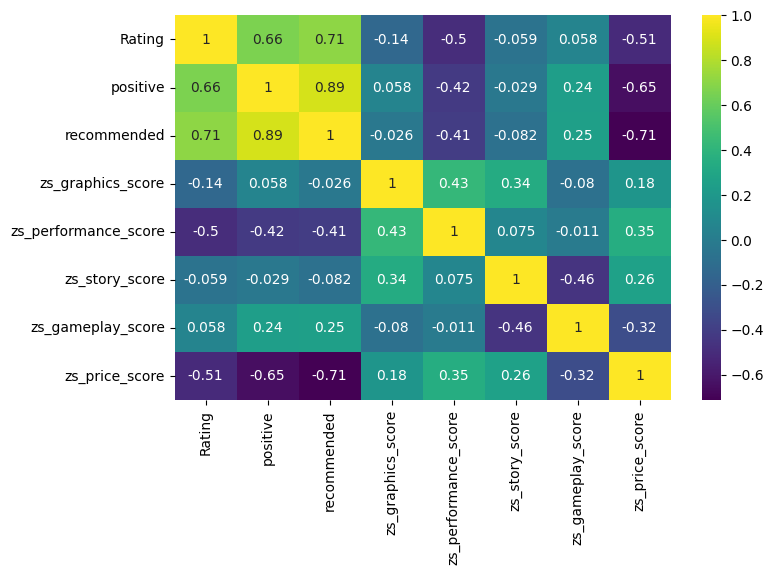

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 5))
mcorr = sentiment_by_game_5w.drop(columns = ["AppID","app_id"]).corr()

sns.heatmap(mcorr, annot=True, cmap='viridis')
plt.show()

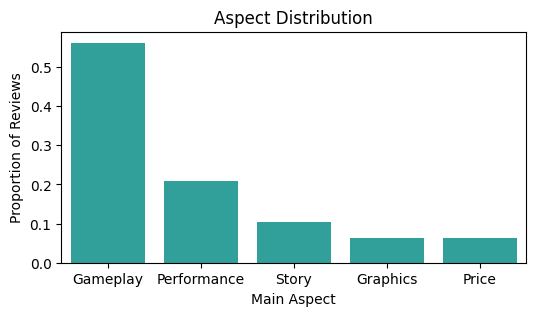

In [19]:
# Proportion by top aspect
prop_aspect = (
    df_sentiment_5w['top_aspect']
    .value_counts(normalize=True)
    .reset_index()
)
prop_aspect.columns = ['top_aspect', 'proportion']

plt.figure(figsize=(6,3))
sns.barplot(
    data=prop_aspect,
    x='top_aspect',
    y='proportion',
    color='lightseagreen'
)

plt.xlabel("Main Aspect")
plt.ylabel("Proportion of Reviews")
plt.title("Aspect Distribution")
plt.show()

In [10]:
prop_aspect

,top_aspect,proportion
0,Gameplay,0.561755
1,Performance,0.208415
2,Story,0.103453
3,Graphics,0.063942
4,Price,0.062434


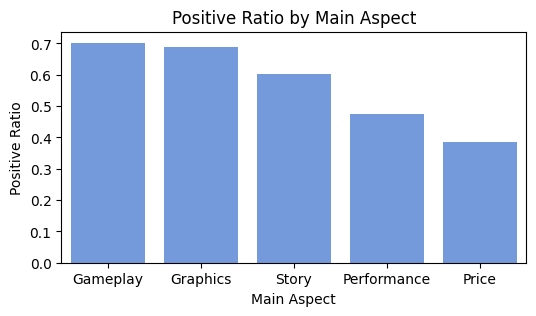

In [20]:
# Plot positive ratio by top aspect
aspect_positive_ratio = (df_sentiment_5w
                         .groupby("top_aspect")[["positive"]]
                         .mean().reset_index()
                         .sort_values("positive", ascending=False))

plt.figure(figsize=(6, 3))
sns.barplot(data=aspect_positive_ratio, x='top_aspect', y='positive',
            color='cornflowerblue')
plt.title('Positive Ratio by Main Aspect')
plt.xlabel('Main Aspect')
plt.ylabel('Positive Ratio')
plt.show()

## Word clouds

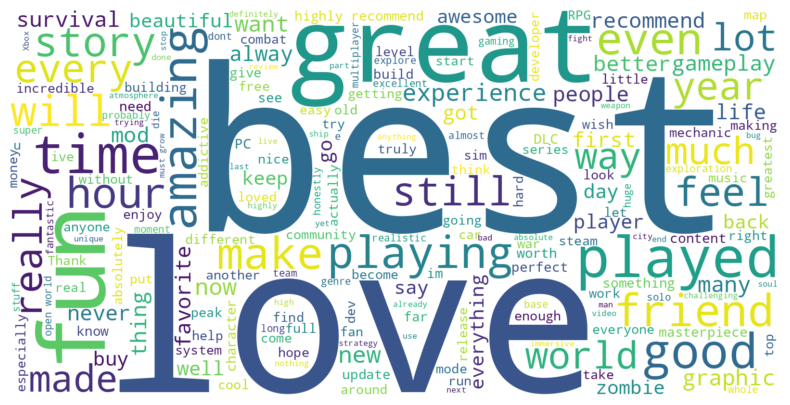

In [ ]:
# Word cloud for all the positive reviews

stopwords = set(STOPWORDS)
stopwords.update(["game","games","yes","one","play","obama","add"])

text = " ".join(df_sentiment_5w[
    df_sentiment_5w["sentiment_label"]=="5 stars"
    ]["clean_review"].astype(str))

wordcloud = WordCloud(
    width=1600, height=800, stopwords = stopwords, background_color="white"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

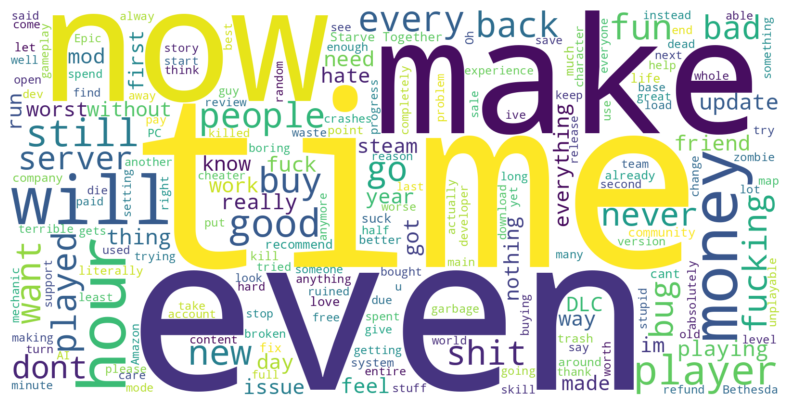

In [ ]:
# Word cloud for all the negative reviews
text = " ".join(df_sentiment_5w[
    df_sentiment_5w["sentiment_label"]=="1 star"
    ]["clean_review"].astype(str))

wordcloud = WordCloud(
    width=1600, height=800, stopwords = stopwords, background_color="white"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

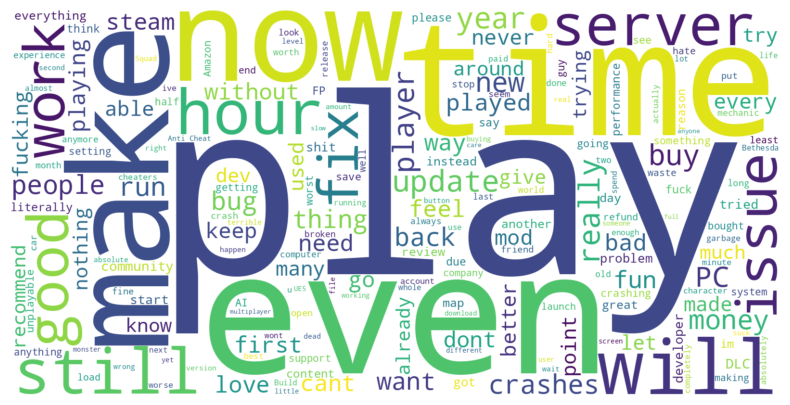

In [ ]:
# Word cloud for negative reviews associated to performance
text = " ".join(df_sentiment_5w[
    (df_sentiment_5w["sentiment_category"]=="Negative") &
    (df_sentiment_5w["top_aspect"]=="Performance")
    ]["clean_review"].astype(str))

wordcloud = WordCloud(
    width=1600, height=800, stopwords = stopwords, background_color="white"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

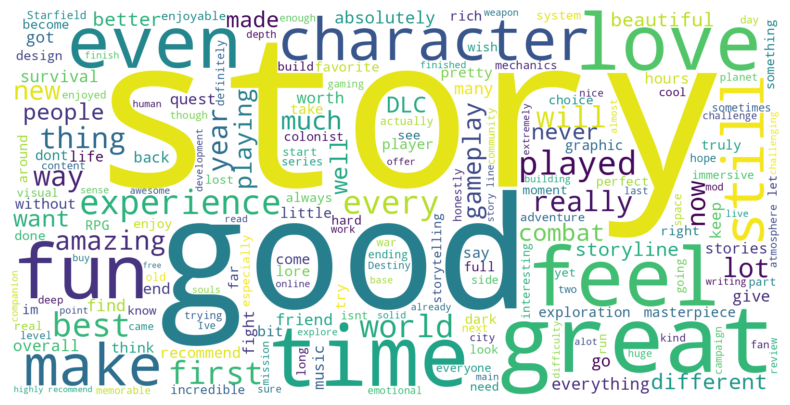

In [ ]:
# Word cloud for negative reviews associated to story
text = " ".join(df_sentiment_5w[
    (df_sentiment_5w["sentiment_category"]=="Positive") &
    (df_sentiment_5w["top_aspect"]=="Story")
    ]["clean_review"].astype(str))

wordcloud = WordCloud(
    width=1600, height=800, stopwords = stopwords, background_color="white"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

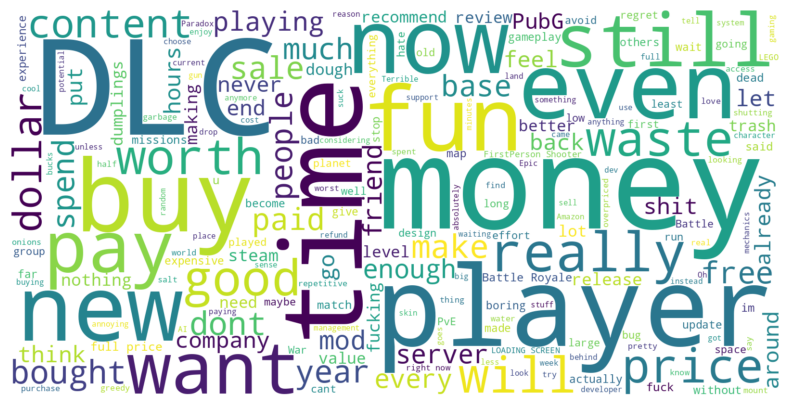

In [ ]:
# Word cloud for negative reviews associated to price
text = " ".join(df_sentiment_5w[
    (df_sentiment_5w["sentiment_category"]=="Negative") &
    (df_sentiment_5w["top_aspect"]=="Price")
    ]["clean_review"].astype(str))

wordcloud = WordCloud(
    width=1600, height=800, stopwords = stopwords, background_color="white"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Save data

In [ ]:
# Save final data
df_summarizer = df_sentiment[['game', 'app_id', 'recommended', 'timestamp_created',
                              'date', 'clean_review', 'sentiment_label','positive',
                              'sentiment_score', 'sentiment_numeric', 'sentiment_category',
                              'word_count', 'top_aspect']]

df_summarizer.to_csv(f"{path}steam_reviews_summarizer.csv", index=False)